# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("ggplot")

In [3]:
pd.set_option('display.max_columns', 200)

# read the data

In [5]:
df = pd.read_csv("StudentPerformanceFactors.csv")

# Explore the data

In [7]:
df.shape

(6607, 20)

In [8]:
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [9]:
df.tail()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
6602                    No              High School               Near   
6603                    No              High School               Near   
6604                    No             Postgraduate               Near   
6605                    No              High School                Far   
6606                    No             Postgraduate               Near   

      Gender  Exam_Score  
6602  Female          68  
6603  Female          69  
6604  Female          68  
6605  Female          68  
6606    Male          64

In [10]:
df.describe().T

count       mean        std   min   25%   50%   75%    max
Hours_Studied      6607.0  19.975329   5.990594   1.0  16.0  20.0  24.0   44.0
Attendance         6607.0  79.977448  11.547475  60.0  70.0  80.0  90.0  100.0
Sleep_Hours        6607.0   7.029060   1.468120   4.0   6.0   7.0   8.0   10.0
Previous_Scores    6607.0  75.070531  14.399784  50.0  63.0  75.0  88.0  100.0
Tutoring_Sessions  6607.0   1.493719   1.230570   0.0   1.0   1.0   2.0    8.0
Physical_Activity  6607.0   2.967610   1.031231   0.0   2.0   3.0   4.0    6.0
Exam_Score         6607.0  67.235659   3.890456  55.0  65.0  67.0  69.0  101.0

# duplicated

In [12]:
df.duplicated().sum()

0

# handle null values

In [14]:
null_ratio = (df.isnull().sum().sum() / df.shape[0]) * 100
null_ratio

3.5568336612683513

In [15]:
null_ratio_column = (df.isnull().sum() / df.shape[0]) * 100
null_ratio_column

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [16]:
pd.DataFrame({"dtypes" : df.dtypes, "null_values" : df.isnull().sum(), "null_ratio" : null_ratio_column})

dtypes  null_values  null_ratio
Hours_Studied                int64            0    0.000000
Attendance                   int64            0    0.000000
Parental_Involvement        object            0    0.000000
Access_to_Resources         object            0    0.000000
Extracurricular_Activities  object            0    0.000000
Sleep_Hours                  int64            0    0.000000
Previous_Scores              int64            0    0.000000
Motivation_Level            object            0    0.000000
Internet_Access             object            0    0.000000
Tutoring_Sessions            int64            0    0.000000
Family_Income               object            0    0.000000
Teacher_Quality             object           78    1.180566
School_Type                 object            0    0.000000
Peer_Influence              object            0    0.000000
Physical_Activity            int64            0    0.000000
Learning_Disabilities       object            0    0.000000
Parental_Education_Level    object           90    1.362192
Distance_from_Home          object           67    1.014076
Gender                      object            0    0.000000
Exam_Score                   int64            0    0.000000

In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum().sum()

0

# handle outlires

In [20]:
numeric_columns = df.select_dtypes(include = ['number'])

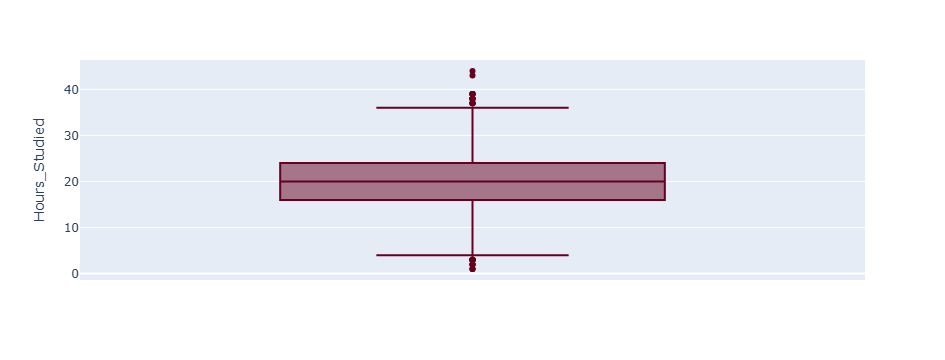

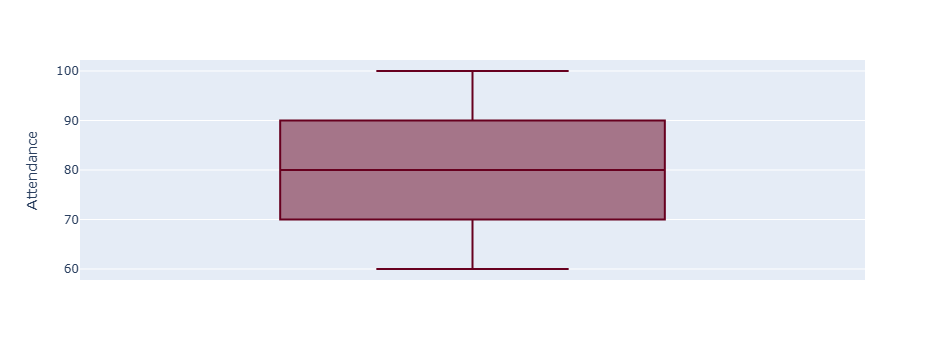

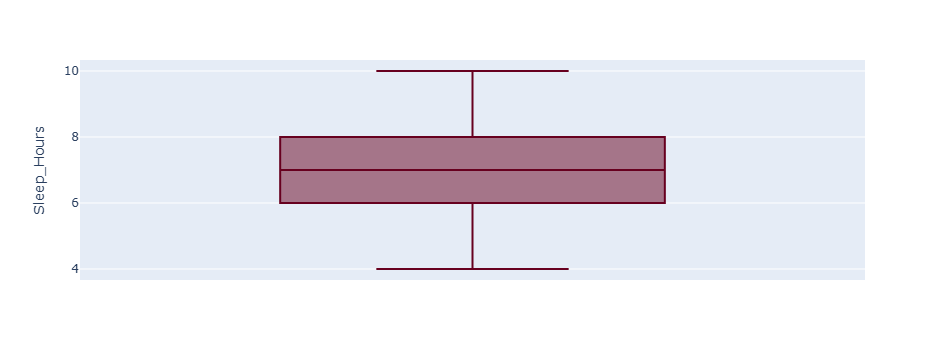

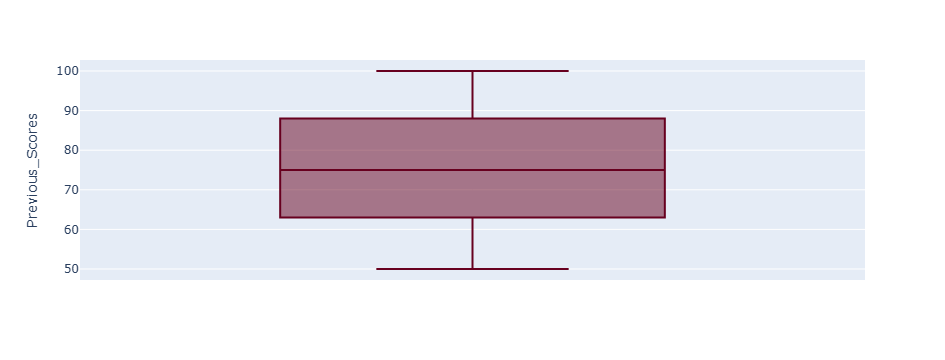

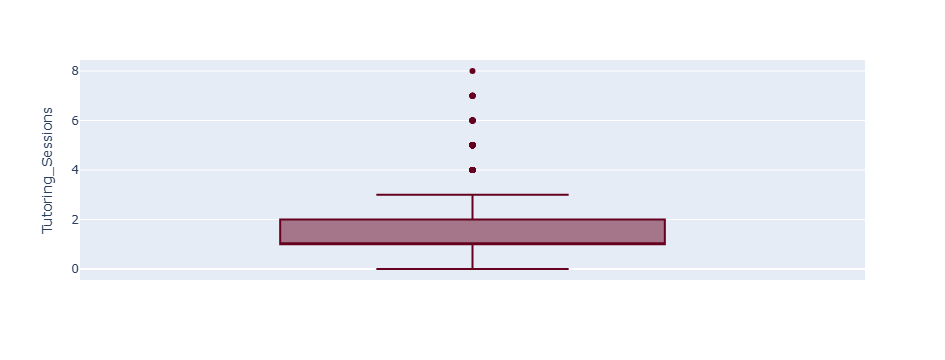

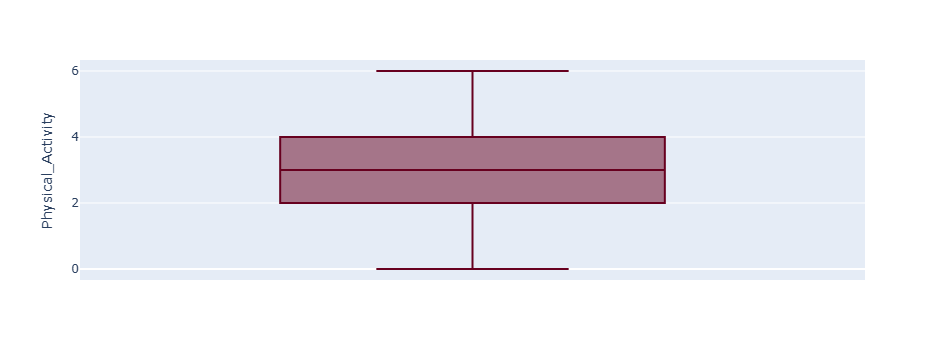

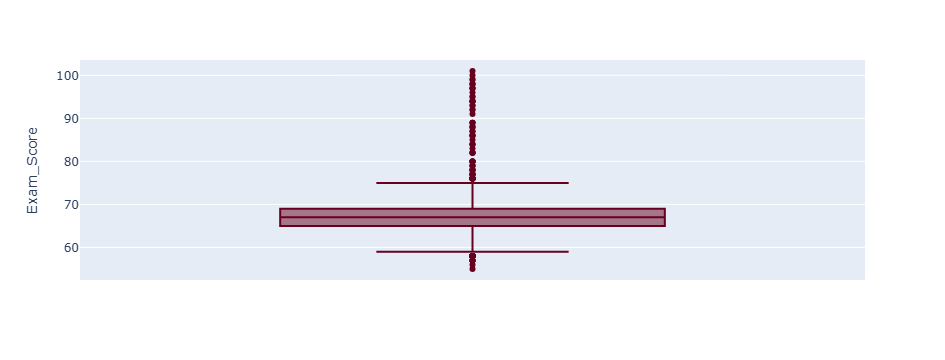

In [21]:
for i in numeric_columns:
    fig = px.box(df, y = i, color_discrete_sequence=px.colors.sequential.RdBu)
    fig.show()

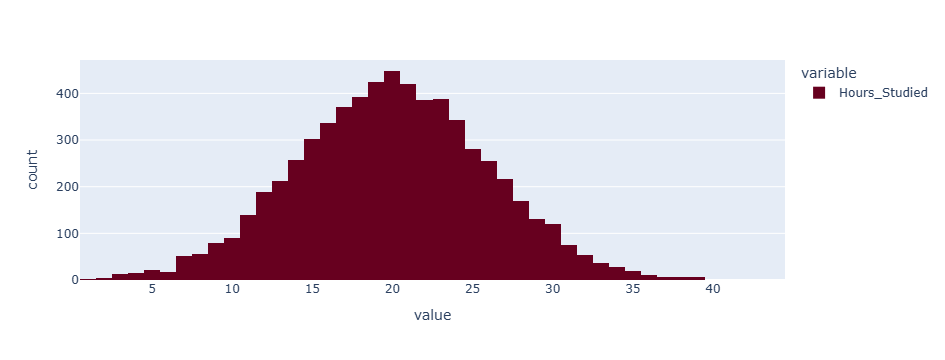

In [22]:
fig = px.histogram(df['Hours_Studied'],color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

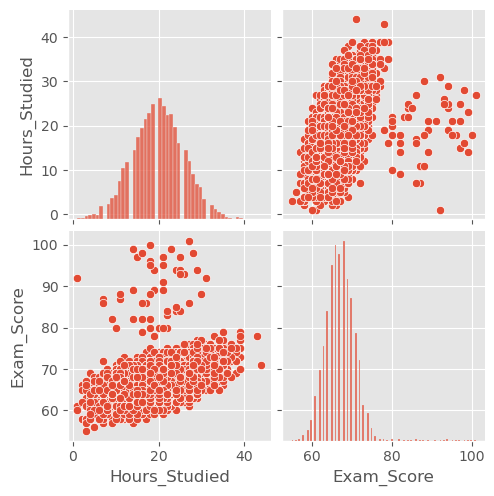

In [23]:
sns.pairplot(data = df,vars = ['Hours_Studied',"Exam_Score"])

### replace the outlires

In [25]:
q1 = df['Hours_Studied'].quantile(0.25)
q3 = df['Hours_Studied'].quantile(0.75)
iqr = q3 - q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

In [26]:
print(lower)
print(upper)
print(df['Hours_Studied'].max())
print(df['Hours_Studied'].min())

4.0
36.0
44
1


In [27]:
upper_outlires = df[df['Hours_Studied'] > upper]["Hours_Studied"].values
lower_outlires = df[df['Hours_Studied'] < lower]["Hours_Studied"].values

In [43]:
df['Hours_Studied'].replace(upper_outlires, upper, inplace = True)
df['Hours_Studied'].replace(lower_outlires, lower, inplace = True)

C:\Users\Mx\AppData\Local\Temp\ipykernel_18124\3853969723.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Mx\AppData\Local\Temp\ipykernel_18124\3853969723.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

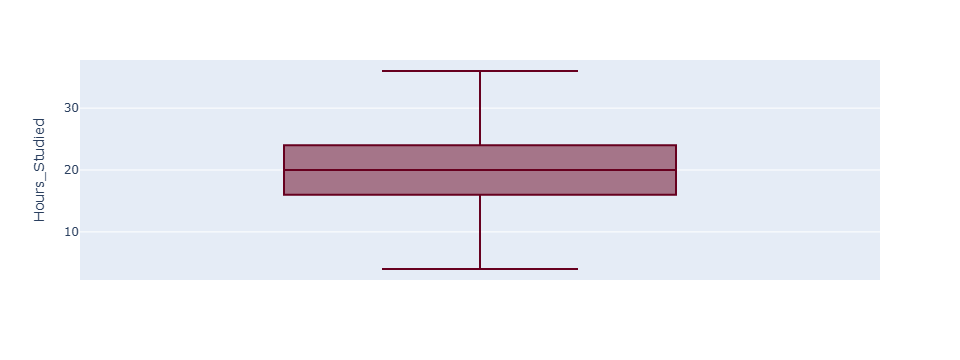

In [45]:
fig = px.box(df, y = 'Hours_Studied', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [46]:
df.reset_index(drop=True)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6373                         No            7               76   
6374                         No            8               81   
6375                        Yes            6               65   
6376                        Yes            6               91   
6377                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6373           Medium             Yes                  1          High   
6374           Medium             Yes                  3           Low   
6375              Low             Yes                  3           Low   
6376             High             Yes                  2           Low   
6377           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6373          Medium      Public       Positive                  2   
6374            High      Public       Positive                  2   
6375          Medium      Public       Negative                  2   
6376          Medium     Private       Positive                  3   
6377          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6373                    No              High School             

In [47]:
df.shape

(6378, 20)

<Axes: >

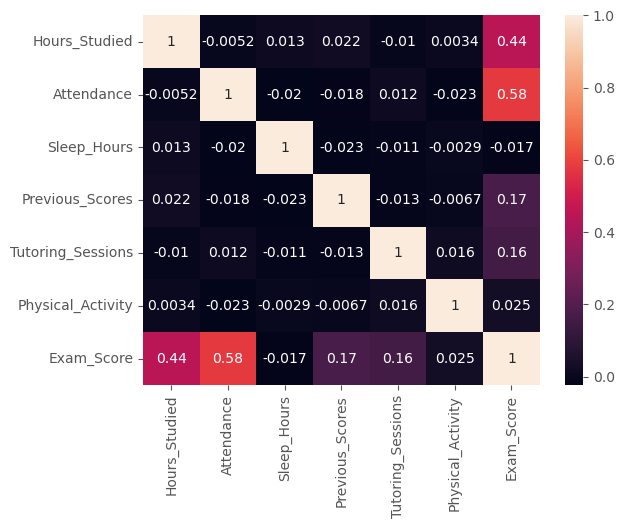

In [48]:
sns.heatmap(data = df.corr(numeric_only=True), annot=True, fmt='.2g')

# vasualization

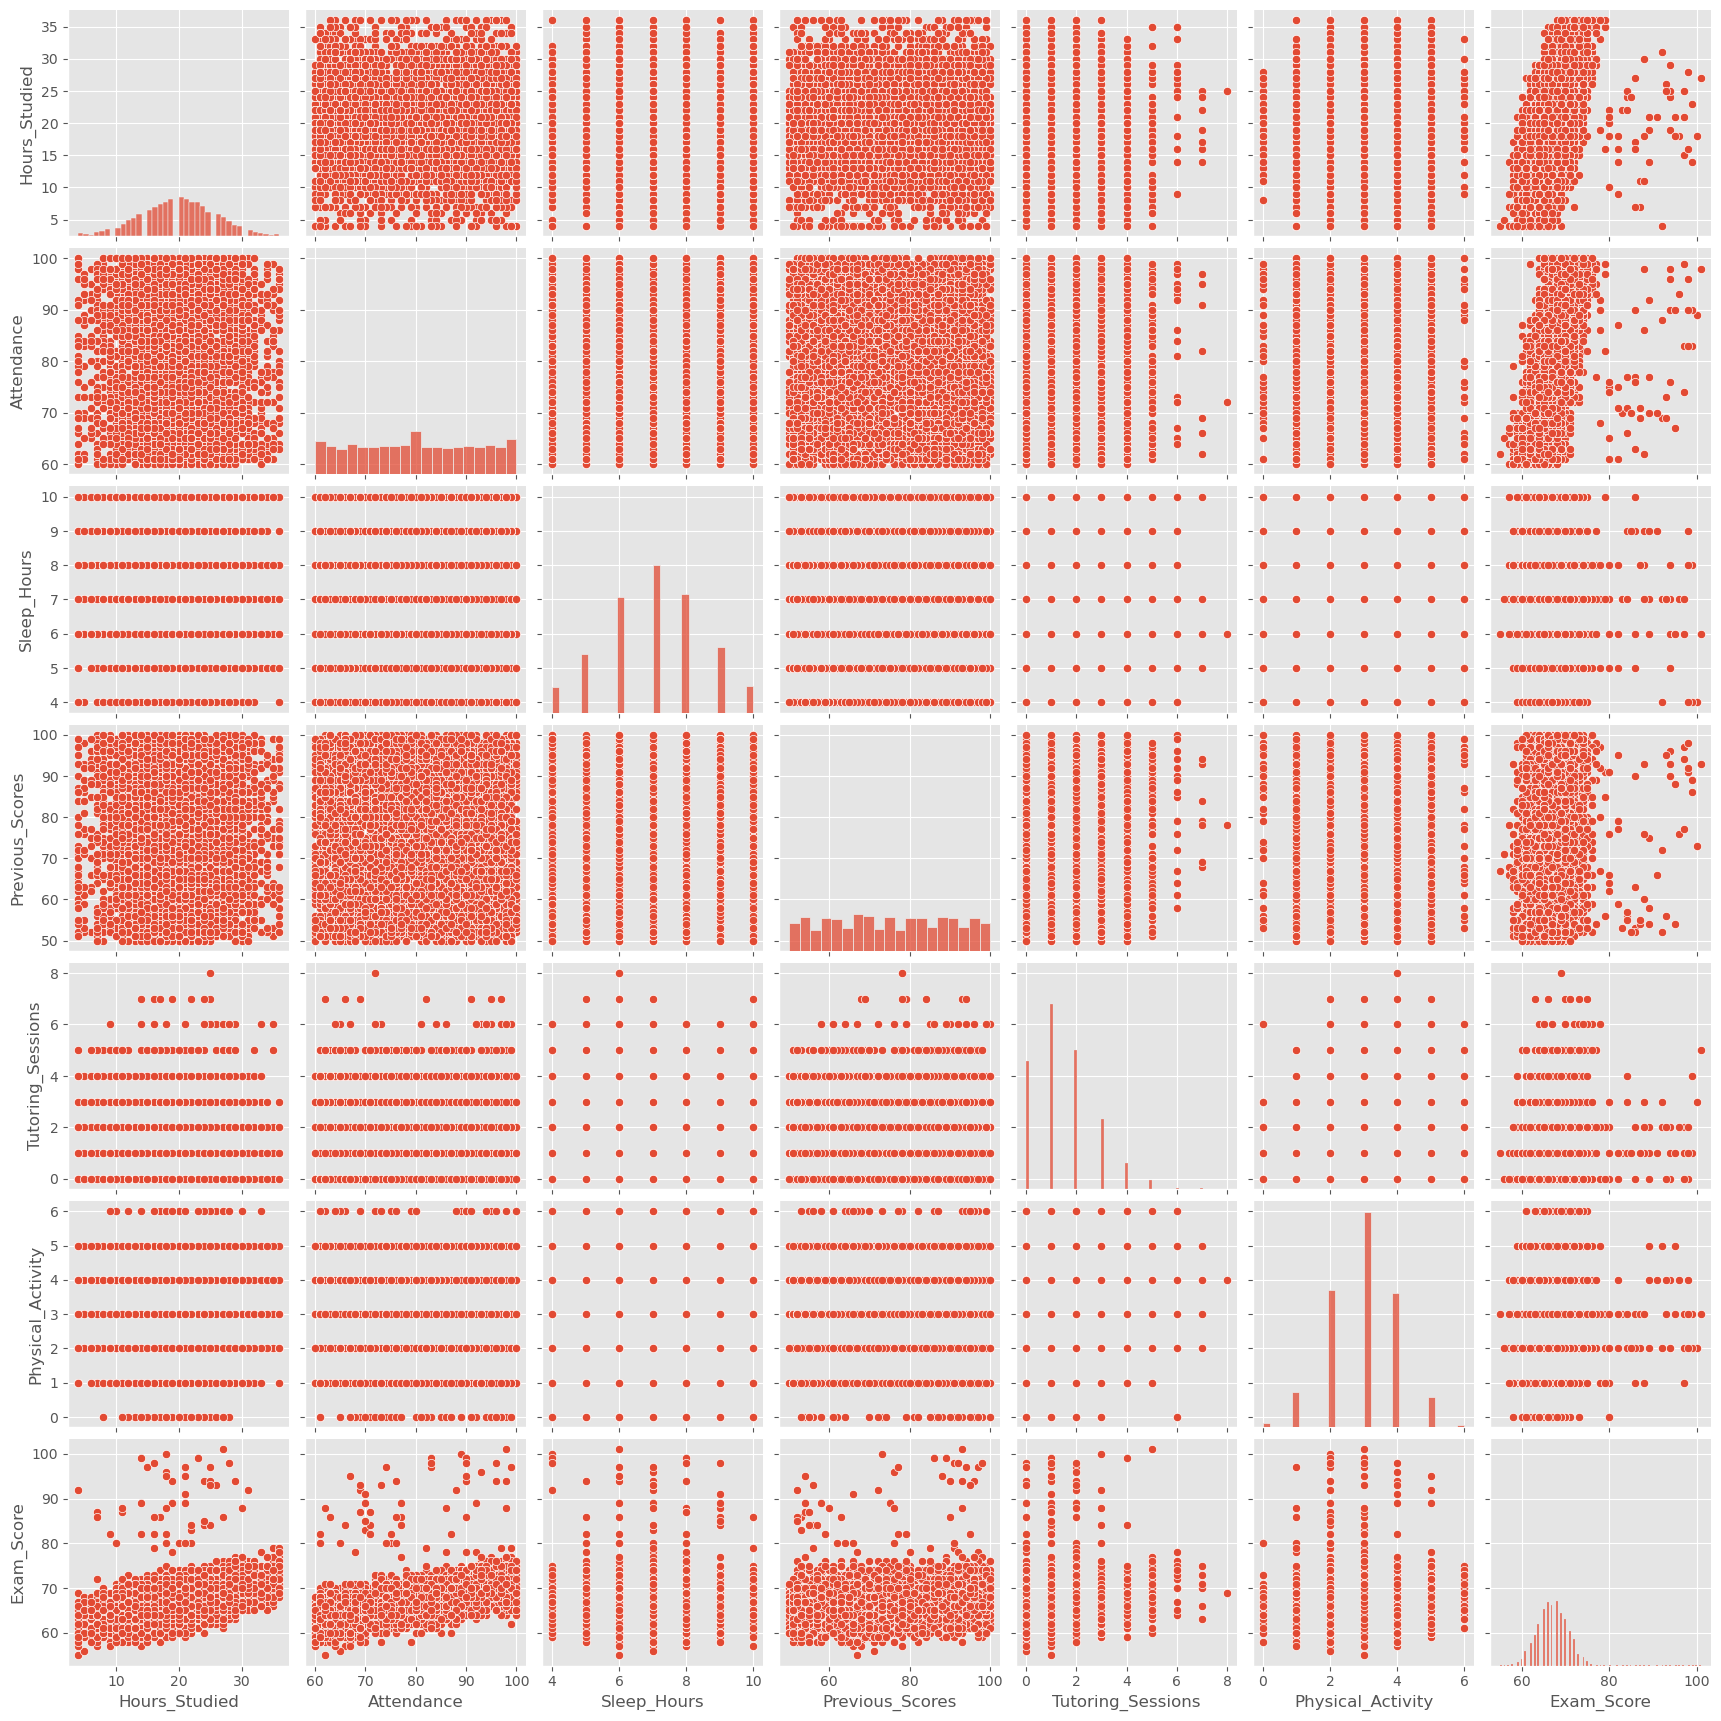

In [50]:
sns.pairplot(data = df)

In [51]:
"""
sleep_to_score = df.groupby("Sleep_Hours")["Exam_Score"].mean()
fig = px.line(df, x = sleep_to_score.index.astype("str"),
             y = sleep_to_score.values,
             text = np.round(sleep_to_score,3),
             title = "sleep_to_score",
             color_discrete_sequence = px.colors.sequential.RdBu)

fig.update_layout(title_text = "Sleep_Hours",
                 title = {"x" : 0.5, "font_size":30, "font_color":"black"},
                 xaxis = dict(title = "Sleep_Hours",title_font_size = 16),
                 yaxis = dict(title = "Exam_Score",title_font_size = 16))
                 
fig.show()
"""

'\nsleep_to_score = df.groupby("Sleep_Hours")["Exam_Score"].mean()\nfig = px.line(df, x = sleep_to_score.index.astype("str"),\n             y = sleep_to_score.values,\n             text = np.round(sleep_to_score,3),\n             title = "sleep_to_score",\n             color_discrete_sequence = px.colors.sequential.RdBu)\n\nfig.update_layout(title_text = "Sleep_Hours",\n                 title = {"x" : 0.5, "font_size":30, "font_color":"black"},\n                 xaxis = dict(title = "Sleep_Hours",title_font_size = 16),\n                 yaxis = dict(title = "Exam_Score",title_font_size = 16))\n                 \nfig.show()\n'

## Sleep_Hours

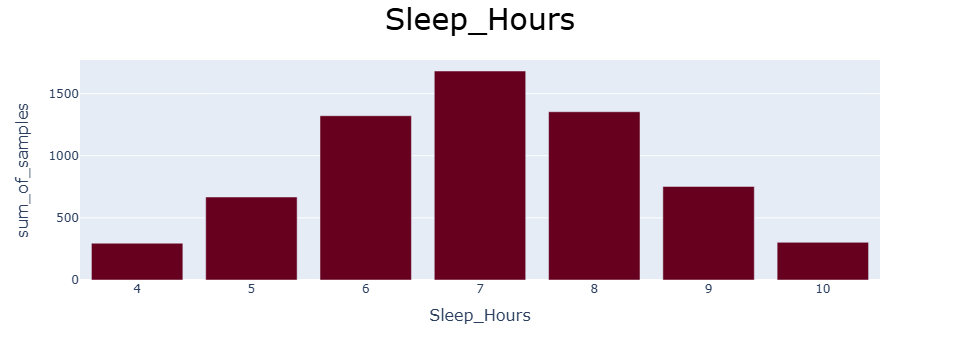

In [53]:
sleep_to_score = df.groupby("Sleep_Hours")["Exam_Score"].mean()
fig = px.bar(df, x = df["Sleep_Hours"].value_counts().index,
             y = df["Sleep_Hours"].value_counts().values,
             #text = np.round(sleep_to_score,3),
             #title = "sleep_to_score",
             color_discrete_sequence = px.colors.sequential.RdBu)

fig.update_layout(title_text = "Sleep_Hours",
                 title = {"x" : 0.5, "font_size":30, "font_color":"black"},
                 xaxis = dict(title = "Sleep_Hours",title_font_size = 16),
                 yaxis = dict(title = "sum_of_samples",title_font_size = 16))
                 
fig.show()

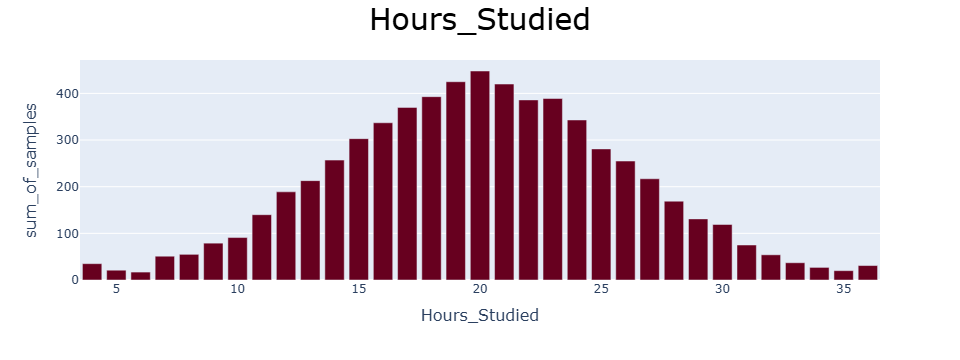

In [54]:
#sleep_to_score = df.groupby("Sleep_Hours")["Exam_Score"].mean()
fig = px.bar(df, x = df["Hours_Studied"].value_counts().index,
             y = df["Hours_Studied"].value_counts().values,
             #text = np.round(sleep_to_score,3),
             #title = "sleep_to_score",
             color_discrete_sequence = px.colors.sequential.RdBu)

fig.update_layout(title_text = "Hours_Studied",
                 title = {"x" : 0.5, "font_size":30, "font_color":"black"},
                 xaxis = dict(title = "Hours_Studied",title_font_size = 16),
                 yaxis = dict(title = "sum_of_samples",title_font_size = 16))
                 
fig.show()

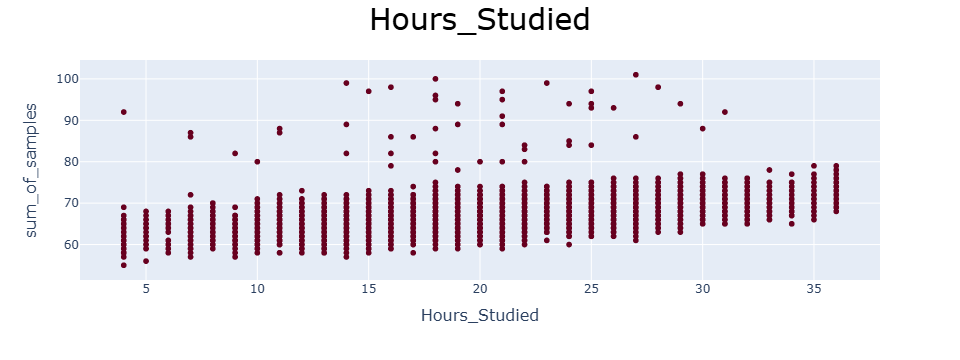

In [55]:
fig = px.scatter(df, x = df["Hours_Studied"],
             y = df["Exam_Score"],
             #text = np.round(sleep_to_score,3),
             #title = "sleep_to_score",
             color_discrete_sequence = px.colors.sequential.RdBu)

fig.update_layout(title_text = "Hours_Studied",
                 title = {"x" : 0.5, "font_size":30, "font_color":"black"},
                 xaxis = dict(title = "Hours_Studied",title_font_size = 16),
                 yaxis = dict(title = "sum_of_samples",title_font_size = 16))
                 
fig.show()

# object columns

In [57]:
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

### ordinal

In [59]:
ordinal_columns = ["Parental_Involvement", "Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality"]
for i in ordinal_columns:
    ordinal = df.groupby(i)["Exam_Score"].mean().sort_values(ascending=False)
    print(ordinal)
    #df[i] = df[i].map(ordinal.rank().astype(int))
    #print(ordinal.rank().astype(int))

Parental_Involvement
High      68.112200
Medium    67.113196
Low       66.378776
Name: Exam_Score, dtype: float64
Access_to_Resources
High      68.103158
Medium    67.156367
Low       66.223705
Name: Exam_Score, dtype: float64
Motivation_Level
High      67.743931
Medium    67.338894
Low       66.764485
Name: Exam_Score, dtype: float64
Family_Income
High      67.841463
Medium    67.371005
Low       66.853215
Name: Exam_Score, dtype: float64
Teacher_Quality
High      67.681890
Medium    67.118662
Low       66.775889
Name: Exam_Score, dtype: float64


### one hot encoder

In [61]:
object_columns = df.select_dtypes(include = ["object"]).columns
object_columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [62]:
df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

In [71]:
bool_columns = df.select_dtypes(include = ["bool"]).columns

for i in bool_columns:
    df[i] = df[i].apply(lambda x : x * 1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6378 non-null   int64
 1   Attendance                             6378 non-null   int64
 2   Sleep_Hours                            6378 non-null   int64
 3   Previous_Scores                        6378 non-null   int64
 4   Tutoring_Sessions                      6378 non-null   int64
 5   Physical_Activity                      6378 non-null   int64
 6   Exam_Score                             6378 non-null   int64
 7   Parental_Involvement_Low               6378 non-null   int64
 8   Parental_Involvement_Medium            6378 non-null   int64
 9   Access_to_Resources_Low                6378 non-null   int64
 10  Access_to_Resources_Medium             6378 non-null   int64
 11  Extracurricular_Activities_Yes     

# split the data 

In [75]:
x = df.drop("Exam_Score", axis = 1)
y = df['Exam_Score']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [109]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.30, random_state=50)

In [171]:
lr = LinearRegression()

In [173]:
#paramiters = {"random_state":[i for i in range(0,100,3)]}

In [175]:
#gridsearch = GridSearchCV(reg, paramiters, cv = 3, scoring = "neg_mean_squared_error")

In [177]:
lr.fit(x_train, y_train)

LinearRegression()

In [178]:
lr.score(x_train, y_train)

0.721760132394348

In [179]:
lr.score(x_test, y_test)

0.7201477861253456

In [186]:
tr_pred = lr.predict(x_train)
ts_pred = lr.predict(x_test)

tr_err = mean_squared_error(y_train, tr_pred)
ts_err = mean_squared_error(y_test, ts_pred)

print(tr_err)
print(ts_err)

4.210174612602807
4.409021212751325


# polynomial

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [147]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=50)

In [151]:
lr_p = LinearRegression()
lr_p.fit(x_train, y_train)

LinearRegression()

In [152]:
print(lr_p.score(x_train, y_train))
print(lr_p.score(x_test, y_test))

0.748338443377135
0.6836291579203378


In [155]:
tr_pred = lr_p.predict(x_train)
ts_pred = lr_p.predict(x_test)

tr_err = mean_squared_error(y_train, tr_pred)
ts_err = mean_squared_error(y_test, ts_pred)

print(np.round(tr_err))
print(np.round(ts_err))

4.0
5.0


In [192]:
mean_absolute_error(y_test, ts_pred)

0.4942689097618225

In [190]:
pd.DataFrame({"y_train":y_train, "tr_pred":tr_pred}), pd.DataFrame({"y_test":y_test, "ts_pred":ts_pred})

(      y_train    tr_pred
 1860       67  67.210269
 5537       63  62.662365
 3918       65  65.546460
 5457       66  65.904789
 3000       60  59.850142
 ...       ...        ...
 2086       65  65.313648
 6475       64  64.368790
 2001       68  67.895492
 5798       66  65.489751
 6010       64  64.417957
 
 [4464 rows x 2 columns],
       y_test    ts_pred
 3023      65  65.535294
 2753      71  70.839381
 6363      70  69.812838
 3752      70  70.450532
 5153      68  68.152829
 ...      ...        ...
 3338      63  63.501401
 2034      72  71.681580
 2439      65  64.676030
 1650      72  72.168865
 4122      68  68.569486
 
 [1914 rows x 2 columns])